# GPT-генератор тестових завдань

Ти - як і я - крутий викладач (чи хоча б так думаєш), але тебе задовбало, що на кожну твою геніальну лекцию потрібно писати цілу купу завдань, ще й з тупими варіантами неправільних відповідей? Нам допоможе

💥 __штучний інтелект__ 💥

За допомогою чарівних слів (prompts) ми можемо попросити всесвтнього улюбленця ChatGPT згенерувати тести до наших лекцій. А потім, за допопмогою звичайних алгоритмів та скриптов форматування створити файли для імпорту в Ментор.

### Класно! А в чому подвох?

Так, деякі моменти справді є:
1. Цей скрипт використовує OpenAI API, яке є платним. Вартість на даний момент становить $0.002 / 1000 токенів. Токен - це числовий код, за допомогою якого модель кодує слова. В середньому, 1000 токенів - це приблизно 750 англійськіх слів. З українською все складніше. Через велику кількість словоформ (фонар, фонарем, офонаріти, ...) кожне слово поділяється на кілька токенів. Отже витрати на обробку українського текста будуть більшими. Втім, OpenAI надає новим користувачам безоплатний кредит. На перший час вистачить.
2. Тести треба уважно вичитувати та редагувати. Повної дурні ChatGPT не генерує, однак може використоввувати не тільки ваш текст, але й підтягувати дані зі своєї бази. Їх релевентність вашому предмету може бути досить відносною. Так, однажди раптом вдруг згенерувався тест з біографїі Сальвадора Далі (правда, тоді модель ще не була налаштована). Інколи генеруються дуже схожі питання та відповіді. Такі завдання можна об'єднати або переробити на тест з кількома правильними відповідями, але це треба робити вручну. В середньому, майже половину тестів з різних причин доводиться відбраковувати. Тож генерувати треба з запасом, щоб було з чого вибрати.
3. Якщо ваш предмет пов'язаний з програмуванням, замість тестів для студентів можуть згенеруватися кейси для юніт-тестів.

В цілому, ChatGPT - корисний помічник. Але його відповіді - це лише чернетка, а не готове рішення. До автомтизації рівня однієї кнопки ще далеко.

### Тут треба програмувати? Ой...

Скрипт майже повністю налаштований. Тобі треба лише змінити значення кількох перемінних. Однак для його виконання на комп'ютері мають бути Python та .NET. При написанні використані версії `Python 3.10` та `.NET Framework 4.7.2` (новіші версії .NET мали проблеми з сумісністю з pythonnet). Ці програми потрібні, щоб згенеровані тести сберегти у форматі Moodle XML. Якщо потрібні лише самі тести, а з програмуванням зв'язуватись не хочеш, їх можна згенерувати за допомогою розширення для Google Docs: https://mc.today/uk/yak-integruvati-shi-do-google-docs/.

## Підготовка

### Що робити?

#### Запустити Юпітер

Документ, який ти читаєш - це блокнкт Юпитер (Jupyter Notebook, https://jupyter.org) - інтерактивне середовище, яке поеднує розмічений текст з фрагментами виконуваного коду. Це дозволяє створити інтерактивні документи.

Разом з цим документом в репозиторії  знаходиться біблотека `SimpleTestModel.dll` (для збереження тестів у форматі Moodle XML) та допоміжний командний файл `jupiter.bat` (для автоматизації запуску).

Скопіюй ці файли на свій комп'ютер. 

Запусти командну строку Windows (`cmd`, пункт Виконати у меню Пуск). За допомогою комади `cd` зміні поточну директорію на ту, куди ти скопіював файли.

Тепер виконай в `cmd` команду `jupiter notebook`.

В браузері відкриється середовище Jupiter і відобразиться поточний каталог. Вибері і відкрий вашу локальну копію цього документа.

Щоб полегшити запуск Юпітера у майбутньому, можеш відредагувати фапйл `jupiter.bat`, вказавши свій путь до файлів.

#### І заплатити грошики

Ну, прямо зараз нічого платити не потрібно. Але потрібно отримати ключ доступу (secret API key) до OpenAI API. 

Перейді на сайт https://platform.openai.com/account/api-keys та згенеруй ключ. Май на увазі, що він відображається на сайті лише один раз і його треба одразу скопіювати і зберегти на своєму комп'ютері.

Рекомендується зберігати ключ доступу в перемінній оточення: https://help.openai.com/en/articles/5112595-best-practices-for-api-key-safety

Якщо не хочеш возитись з переміннити, можеш зберігти ключ прямо в коді скрипта (див. нижче). Але це менш безпечно: можна випадково поширити ключ, переславши комусь документ.

#### Встановити програмне середовище

Для виконання сриптів використовується мова програмування Python. Якщо на вашому комп'ютері її немає - встанови з офіційного сайта https://www.python.org/downloads/.

Виконай насупний фрагмент коду, щоб встановити необхідні бібліотеки:
- openai - для роботи  з ChatGPT,
- pythonnet - для подальшого форматування тестів

Інсталювати пакети потрібно лише раз. В подальшому пропускайте цей код


In [ ]:
# потрібно виконати лише один раз

!pip install openai
!pip install pythonnet

## Початок роботи
### Налаштування моделі

Наступний фрагмент коду містить налаштування для роботи з ChatGPT. Його необхідно виконувати на почтаку кожного сеансу редагування, тобто, при кожному запуску Jupyter Notebook.

Передбачається що ключ доступу знаходиться в перемінній середовища `OPENAI_API_KEY`. Якщо це не так, відредагуйте цей скрипт відповідно до ваших налаштувань.

Про налаштування моделі більш детально тут: https://platform.openai.com/docs/api-reference/making-requests


In [ ]:
# виконувати на почтаку кожного сеансу редагування

import os
import openai
openai.organization = "org-AVwsBEA1KsZtlTIPmIJjDy9Y"
openai.api_key = os.getenv("OPENAI_API_KEY")

# якщо ви не зберігли ключ у перемінній середовища, розкоментуйте строку нижче, та вставте ключ туди
# openai.api_key = "ваш секретний ключ"

# налаштування моделі
MODEL = "gpt-3.5-turbo"
TEMPERATURE = 0.3
RESPONSE_MAX_TOKENS = 1024

# додаткові налаштуваня скрипта
quiz_num = 1    # номер файла для збереження тестів
alter_translator = False    # чи використовується сторонній перекаладач

print("Done!")

Привітайся з ChatGPT, щоб переконатись, що модель налаштована правильно. Відповідь моделі з'явиться безпосередньо під кодом. Якщо ти вже це робив, і певен, що все так, як треба, можеш пропусти привітання і одразу переходити до роботи з підказками

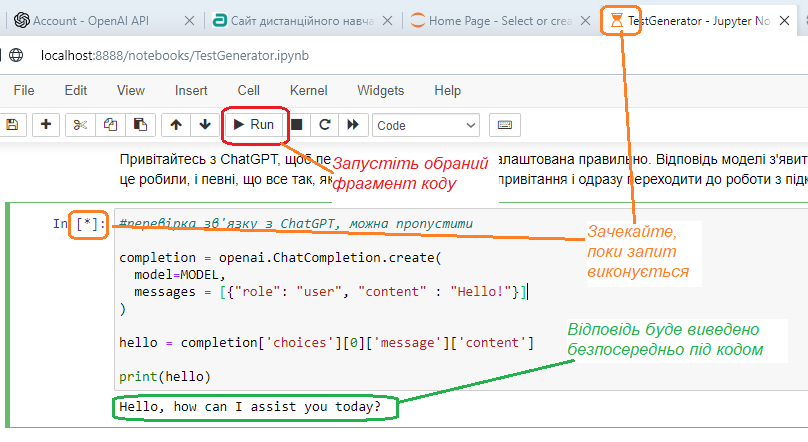

In [ ]:
#перевірка зв'язку з ChatGPT, можна пропустити

completion = openai.ChatCompletion.create(
  model=MODEL, 
  messages = [{"role": "user", "content" : "Hello!"}]
)

hello = completion['choices'][0]['message']['content']

print(hello)

### А як йому пояснити, що мені треба?

Ми "спілкуємось" с ChatGPT за допомогою підказок-промптів (prompts). Відредагуй перемінні `SUBJECT_PROMPT` та `TASK_PROMPT` в наступному фрагменті коду, щоб пояснити ChatGPT, над чим ти працюєш, та що тобі потрібно. `SYSTEM_PROMPT` можна залишити без змін.
Навіть якщо решта скриптів працює на налаштуваннях  за замовчуванням, промпти треба змінити відповідно до свого предмету. Допоможить нашому штучноінтелектуальному помічнику "уявити" себе на твому місці.
Не забудь виконати код.
ChatGPT розуміє українську, але навчався англійською. Тому навіть для обробки українських текстів промпти краще писати английською, так він працює більш стабільно.  Приклади промптів можна пошукати в Інтернеті, наприклад, тут: https://github.com/f/awesome-chatgpt-prompts

In [ ]:
# це можна залишити
SYSTEM_PROMPT = "You are a helpful assistant. "

# поясніть, що ви викладаєте
SUBJECT_PROMPT = "You are to act as a computer science expert and teacher. "

# та яка допомога вам потрібна
TASK_PROMPT = "Please generate 4 tests with 4 answers. "

print("Done!")

## 🚀 Вперед!

Все готово!

Наступні команди ми будемо виконувати багато разів, обробляючи невеликі розділи конспекту або методички.
Виконай наступний фрагмент коду. Під ним має з'явитися поле для вводу тексту. Скопіюй туди частину тексту лекції або методички. Пам'ятай про обмеження: в одному запиті ChatGPT обробляє не більше 4097 токенів. Тому не намагайся запхати туди всю методичку одразу. Обробляй невеликі фрагменти по 1-3 сторінки. Невелика кількість "символьного мусора": номери сторінок, шматки формул, номери рисунків - ні на що не впливає. Тож можна не заморачуватись очищенням тексту, копіюй все, що потрапило під курсор.

In [ ]:
from IPython.display import display
from ipywidgets import Textarea, Layout

Textarea_lec = Textarea(
    placeholder='Скопіюйте сюди частину тексту лекції або методички',
    description='Текст:',
    layout=Layout(width='800px', height='200px')
)

display(Textarea_lec)

А тепер ми передамо свою просьбу ChatGPT, виконавши наступний фрагмент коду. Наш помічник відповідає неквапливо. Виконання запиту займає від 40 секунд до кількох хвилин. Відповідь з'явится безпосоредньо під кодом. 

Якщо сталася мережева помилка (таке буває), або згенерувалося щось не те, спробуйте перевиконати запит. Якщо не допомогає - перевірте настройки моделі та промпти. Інколи невдача може бути пов'язана з намаганням обробити надто великий обсяг тексту. Тоді виникає помилка: "InvalidRequestError: This model's maximum context length is 4097 tokens. However, your messages resulted in 4162 tokens. Please reduce the length of the messages.". Інколи сервіс перевантажений і погано працює через велику кількість запитів. Тут нічого не вдієшь, доводиться чекати, поки американці полягають спати та звільнять наш помічник.

In [ ]:
lecture_text = Textarea_lec.value

assistant_prompt = SUBJECT_PROMPT
user_prompt = TASK_PROMPT + lecture_text

# можна інакше:
# assistant_prompt = SUBJECT_PROMPT + TASK_PROMPT
# user_prompt = lecture_text

completion = openai.ChatCompletion.create(
  model=MODEL, 
  messages = [{"role": "system", "content" : SYSTEM_PROMPT},
{"role": "assistant", "content" : assistant_prompt},
{"role": "user", "content" : user_prompt}]
)

output_text = completion['choices'][0]['message']['content']

alter_translator = False

print(output_text)

Якщо згенерований текст англійською, попроси перекласти його, виконавши наступний скрипт. Якщо переклад не потрібен - пропусти його. ChatGPT розуміє українську, але не дуже добре нею володіє. Інколи, переклад не вдається, бо потребує значно більше токенів, ніж англійський текст. Це не страшно. Якщо получилось погано, ти можешь скористатися стороннім перекладачем, таким як https://translate.google.com/ або https://www.deepl.com/translator.

In [ ]:
UA_PROMPT = "Translate in Ukrainian. "
#prompt = UA_PROMPT + output_text

completion = openai.ChatCompletion.create(
  model=MODEL, 
  messages = [{"role": "system", "content" : SYSTEM_PROMPT},
{"role": "assistant", "content" : UA_PROMPT},
{"role": "user", "content" : output_text}]
)

output_text = completion['choices'][0]['message']['content']

#print(prompt)
print(output_text)

__Тести готові!__

## Але ж мені потрібні тести на Менторі!

Якщо тобі потрібні лише тести, на цьому можна закінчити. Але ми можемо преобразовати їх у формат Moodle XML, щоб імпортувати у Ментор. Для цього штучний інтелект вже не потрібний - лише звичайний алгоритм та регулярні вирази. 

Але спочатку розберемося із мовою завдань. Якщо тобі потрібна українська, але не влаштовує якість перекладу ChatGPT, можешь скористатися стороннім перекладачем. Скопіюй відповідь ChatGPT та переклади за допомогою сторонньої програми. Потім виконай наступний фрагмент коду і скопіюй переклад у текстове поле.

Якщо альтернативний перекладач не використовується - пропусти наступний код, не виконуючи.


In [ ]:
# Виконувати тільки при використанні стороннього перекладача

alter_translator = True
Textarea_ua = Textarea(
    placeholder='Скопіюйте сюди текст, перекладений альтернативним перекладачем',
    description='Переклад:',
    layout=Layout(width='800px', height='200px')
)

display(Textarea_ua)

Тепер відформатуємо тести, щоб експортувати їх у XML. Наспупний фрагмент має відформатувати відповідь ChatGPT таким чином, щоб кожна строка починалась з одного з символів: `. + - ;`

Ось так:


  .Питання  
  +Правильна відповідь  
  -Неправильна відповідь  
  ;

Для цього використовується наступний скрипт. На його початку ідуть шаблони регулярних виразів, за допомогою яких розпізнаються окремі частки тесту. Деяка складність полягає в тому, що ChatGPT не має сталого формату оформлення та нумерування тестів. Тому інколи (рідко) скрипт може спрацювати неправильно або не повністю. Окрему складність становлять випадки, коли строки пронумеровані символами кирилиці, тоді через випадкові співпадіння перших літер питання або відповіді можуть невірно розпізнатися (таке ж буває і з англійською, артикль _A_ може розпізнатися як номер варіанта).

In [ ]:
import re

# шаблон номера на отдельной строке
quest_extra_line = r'Test \d:\n\n|Test \d:\n|Тест \d:\n\n|Тест \d:\n'
# шаблон питання
quest_re = r'\d.|\d\)|Q\d:|Q:\d.|Q: \d.|Q:|П\d:|П:\d.|П: \d.|П:|Test \d:|Test \d.|Тест \d:|Тест \d.|Question:|Питання:'
# шаблон відповіді
answ_re = r'[a-z]\)|[A-Z]\)|[a-z]\.|[A-Z]\.|[а-я]\)|[А-Я]\)|[а-я]\.|[А-Я]\.|A\d:|В\d:'
# шаблон правильної відповіді
corr_re = r'Answer:|Answer|Відповідь:|Відповідь|Правильна відповідь:'

if alter_translator and Textarea_ua.value != '':
  output_text = Textarea_ua.value

question_text  = re.sub(quest_extra_line, 'Q:', output_text)
question_text  = re.sub('Q:Q|Q:П', 'Q', question_text)

#question_text  = re.sub(quest_extra_line, '', output_text)
# хз, как лучше
# номер теста отдельной строкой - сплошной гемор

output_lines = question_text.split('\n')
query_dict = dict()

query = ''
answers = []
answ_symbol = []

for line in output_lines:

  # поиск вопросов 
  if re.match(quest_re, line.lstrip()): 
    query = re.split(quest_re, line, 1)[1].strip()
    if query != '': query_dict[query] = []

  # поиск ответов
  if re.match(answ_re , line.lstrip()): 
        if query != '': query_dict[query].append(line.strip())

  # отмечаем правильные ответы
  if re.match(corr_re , line.lstrip()): 
    answ_symbol = re.split(corr_re , line.lstrip(), 1)[1].split()
    for a in answ_symbol:
      for i, answ in enumerate(query_dict[query]):
        if answ[0] == a[0]: 
          answ = '+' + re.split(answ_re, answ, 1)[1].strip()
          query_dict[query][i] = answ


for q in query_dict:
  for i, answ in enumerate(query_dict[q]):
    if answ[0] != '+':
      answ = '-' + re.split(answ_re, answ, 1)[1].strip()
      query_dict[q][i] = answ
      
test_text = ""
for q in query_dict:
  test_text += '.' + q + '\n'
  for a in query_dict[q]:
    test_text += a + '\n'
  test_text += ';\n'

Textarea_test = Textarea(
    description='Тести:',
    value=test_text,
    layout=Layout(width='800px', height='500px')
)

display(Textarea_test)

Настав час остаточного редагування!

Якщо все спрацювало, після виконання попереднього скрипту має з'явитися поле для редагування тестів.
Уважно перевір питання та відповіді. Видалі невдалі варіанти. Перевір коректність перекладу українською. Видалі або об'єднай схожі питання. Перевір правильні та неправильні відповіді - їх маєможе бути будь-яка кількість.

Тести готові?

Наступний фрагмент коду створить файл у форматі Moodle XML. Для цього використовується бібліотека `SimpleTestModel.dll`, написана на .NET Framework 4.7.2. Вона має знаходитись у тій же директорії, шо і цей блокнот.


Відредагуй значення перемінних:
- `preambula` - текст, який буде додано до початку кожного питання, наприклад, якісь пояснення або інструкціі; якщо не потрібно - залиш пустим;
- `name_pattern` - початок імені питання (при геренації файлу до нього буде додоано якесь число); це допоможе ідентифікувати питання в базі питань Ментора.

In [ ]:
# повторюваний текст перед кожним питанням
preambula = ''

# початкові символи імені питання
name_pattern = 'Data'

print("Done!")

Виконай код нижче, щоб створити XML файл. Файл буде розташований у тій же директорії, що і файл блокноту і буде мати ім'я `quizNN.xml`, де `NN` - порядковий номер в даному сеансі. Файли наступних сеансів перезаписують попередні, тому перед початком сеансу рекомендується видалити або перемістити старі файли, щоб не створювати плутанини.

In [ ]:
# !pip install pythonnet

quiz = Textarea_test.value

import clr
dir_path = os.getcwd()
clr.AddReference(dir_path + r'\SimpleTestModel.dll')
#clr.AddReference(r'E:\Users\Python\TestGenerator\SimpleTestModel.dll')

from TaskModel import FileTaskBuilder
my_instance = FileTaskBuilder()
my_instance.NamePattern = name_pattern
my_instance.Preambula = preambula
file_name = r'quiz' + '{:02d}'.format(quiz_num) + r'.xml'


n = my_instance.SaveToXmlFromManyAnswersText(quiz, dir_path + r'\\' + file_name)
quiz_num +=1

print(str(n) + ' queries export in file ' + file_name)


Тепер зайді у Ментор та скористайтесь функцією імпорту питань

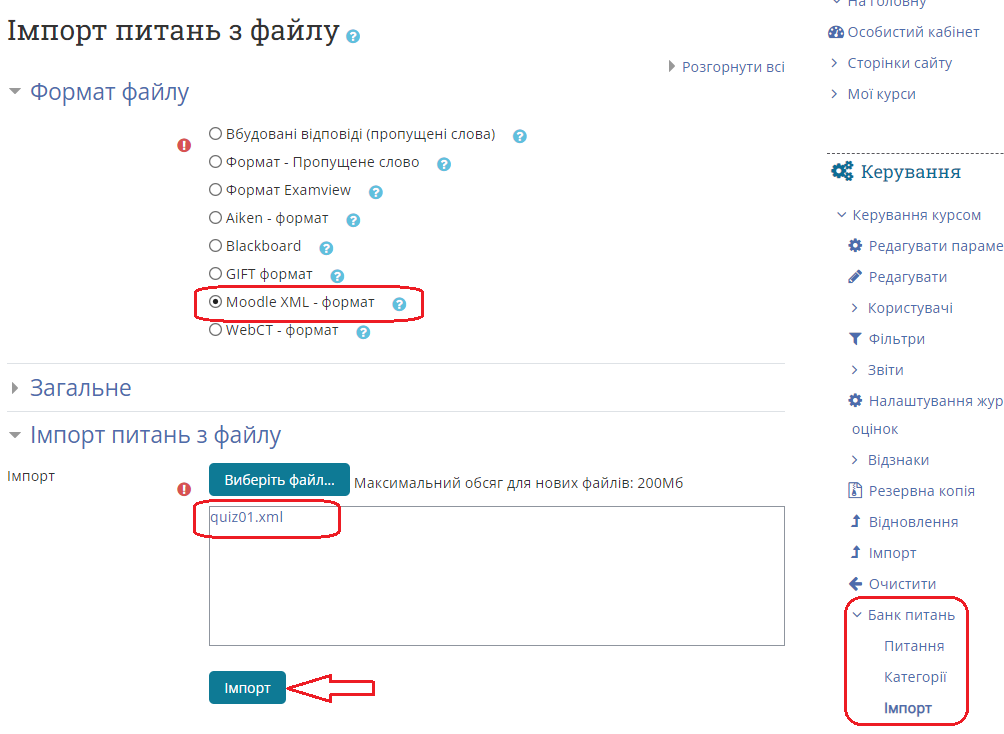


### Тільки 4 тести? Хочу ще!

Без проблем! Виконай комаду меню, щоб прибрати результати попередніх завдань:

`Cell \ All Output \ Clear`



Тепер повернісь до розділу "🚀 Вперед!":

http://localhost:8888/notebooks/TestGenerator.ipynb#🚀-Вперед!

та продовжуй обробляти наступні фрагменти тексту.

### Навіщо стільки тексту?

Я намагалась якомога детальніше пояснити роботу зі скриптом. Коли ти освоїшь цю технологію, зроби для себе робочу копію блокноту, залишивши фрагменти коду і видаливши зайві пояснення та картинки


---

З побажанням успіхів вам і вашим студентам,

  _Elena Yashina_, Kharkiv, 2023